In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import locale

In [137]:
mpl.rc('font', family='Noto Sans CJK TC')
locale.setlocale(locale.LC_NUMERIC,"")

'zh_TW.UTF-8'

資料來源：https://www.kaggle.com/drgilermo/nba-players-stats#Seasons_Stats.csv

In [102]:
df=pd.read_csv("Seasons_Stats.csv")
df2=df[(df.Year==2017)]
df2.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24096,24096,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
24097,24097,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
24098,24098,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,...,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
24099,24099,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
24100,24100,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0


In [103]:
df3=df2[["3P","FG"]]
df3.head()

,3P,FG
24096,94.0,134.0
24097,37.0,70.0
24098,1.0,5.0
24099,36.0,65.0
24100,0.0,374.0


In [110]:
x_train1=np.array(df3["3P"][:300]).reshape(len(np.array(df3["3P"][:300])),1)
y_train1=np.array(df3.FG[:300]).reshape(len(df3.FG[:300]),1)
x_test1=np.array(df3["3P"][300:]).reshape(len(np.array(df3["3P"][300:])),1)
y_test1=np.array(df3.FG[300:]).reshape(len(df3.FG[300:]),1)  #沒用自訂取樣函數，自己亂取的

In [111]:
X=np.array(df3["3P"]).reshape(len(df3["3P"]),1)
y=np.array(df3.FG).reshape(len(df3.FG),1)

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 9487)

In [115]:
regr=LinearRegression()

In [116]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
y_pred=regr.predict(x_test)

Text(0,0.5,'總得分')

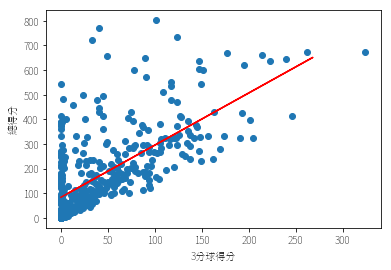

In [139]:
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred,"r")
plt.xlabel("3分球得分")
plt.ylabel("總得分")